# Problem Statement 
The objective of this project is to design or to develope a robus or accurate credit card fraud detection system that can effectively identify and prevent fraudulent traanscation in real time .

# why this problem 
addresing credit fraud through an accurate & efficient fraud detection system helps protect both financial institution & consumers also provides peace of mind to customers and maintain integrity of the financial system 

# solution 
Data Collection: Collect a labeled dataset that includes historical credit card transactions.The dataset should contain relevant features such as transaction amount, merchant information, transaction time, and other related variables.

Data Preprocessing: Preprocess the dataset by performing tasks such as data cleaning, handling missing values, feature selection and normalization. Ensure that the dataset is balanced, meaning it has a similar number of fraudulent and valid transactions to prevent bias in the model.

Splitting the Dataset: Split the preprocessed dataset into training and testing sets.


Model Training: Train the  model on the training data, using a suitable metric 

Model Evaluation: Evaluate the trained model using the testing data. Calculate metrics such as accuracy, precision, recall, and F2-score to assess the model's performance in correctly identifying fraudulent transactions and minimizing false positives and false negatives.

Fine Tuning: Adjust the Decision Tree model's parameters and hyperparameters, such as maximum depth, minimum samples per leaf and splitting criteria, to optimize its performance thereby preventing overfitting and improve the model's generalization ability.

# Applied Model 
Experiment with various machine learning algorithms like:
Logistic Regression
Decision Trees
Random Forests

# Overall Conclusion
Logistic Regression resulted in 93% accuracy
Decision Trees resulted in 93.30985915492957 accuracy
Random Forests 94.01408450704226 accuracy 
Our credit card fraud detection system ,powered by random forest classifier hold great potential in safeguarding financial transaction freom faudulent activities

In [4]:
import numpy as np  #Numpy or numerical python is used for numerical computing it supports n dimensional aaray
import pandas as pd #Pandas is a Python library for data manipulation and analysis.
import matplotlib.pyplot as plt #matplotlib is a powerful python library used for creating static interactive visualizations.
import seaborn as sns #provides a high level interface for drawing attractive and informative statistical graphics.


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: xlabel='Amount', ylabel='Density'>

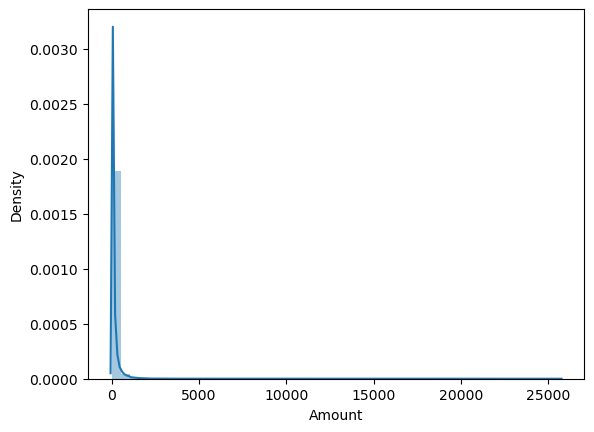

In [7]:
sns.distplot(df["Amount"]) #Highly skeewed 

In [8]:
#solution for above skeweness of amount column is apply standard scaler
ss = StandardScaler()
df["Amount"]=ss.fit_transform(pd.DataFrame(df["Amount"]))
df["Amount"]

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

In [9]:
df.duplicated().any()

True

In [10]:
#since there were duplicates rows present so as a solution ---drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
df["Class"].value_counts() # highly imbalanced data

Class
0    283253
1       473
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

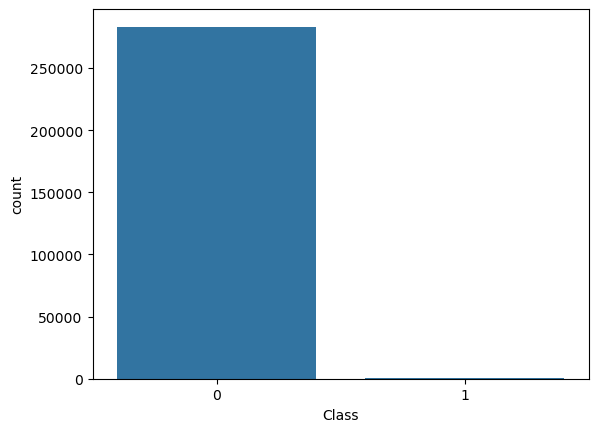

In [12]:
sns.countplot(data=df,x="Class")

In [13]:
df[df["Class"]==0] #gives all the values where class is zero 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [14]:
df[df["Class"]==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [15]:
valid=df[df["Class"]==0] 
fraud=df[df["Class"]==1] 

In [16]:
valid.shape

(283253, 31)

In [17]:
fraud.shape

(473, 31)

In [18]:
valid_sample=valid.sample(n=473)
valid_sample.shape

(473, 31)

In [19]:
new_df=pd.concat([valid_sample,fraud],ignore_index=True)
new_df.shape

(946, 31)

In [20]:
new_df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,82376.0,1.449529,-0.715116,-1.020896,-1.836095,1.405556,3.227764,-1.118835,0.800954,-0.908656,...,-0.145720,-0.697945,0.092316,0.980219,0.392318,-0.465446,0.012389,0.017135,-0.293258,0
1,122432.0,-0.694205,-0.841213,1.207107,1.236399,-0.280967,-0.305869,0.013111,-0.026802,0.212868,...,0.494863,1.208982,0.482903,0.123687,-0.736028,0.481252,0.185668,0.249768,0.446388,0


In [21]:
new_df.drop("Time",axis=1,inplace=True)

In [22]:
new_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [23]:
features=new_df.iloc[:,:-1]
target=new_df.iloc[:,-1]

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3,random_state=42)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(662, 29) (662,) (284, 29) (284,)


In [25]:
#Logistic Regression
lr= LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [26]:
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"confusion_matrix : \n{cm} \n classification_report : \n{cr}")

confusion_matrix : 
[[130  10]
 [ 10 134]] 
 classification_report : 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       140
           1       0.93      0.93      0.93       144

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



In [27]:
lr.score(xtrain,ytrain) #training is more than test so there is overfitting

0.9531722054380665

In [28]:
lr.score(xtest,ytest)

0.9295774647887324

In [29]:
#Decision Tree Classifier 
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [30]:
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"confusion_matrix : \n{cm} \n classification_report : \n{cr}")

confusion_matrix : 
[[124  16]
 [ 10 134]] 
 classification_report : 
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       140
           1       0.89      0.93      0.91       144

    accuracy                           0.91       284
   macro avg       0.91      0.91      0.91       284
weighted avg       0.91      0.91      0.91       284



In [31]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.07445018, 0.00557771,
       0.02113658, 0.        , 0.03291295, 0.        , 0.00597526,
       0.01728427, 0.01097466, 0.00601891, 0.71598411, 0.        ,
       0.01137097, 0.01208503, 0.        , 0.01918715, 0.01954588,
       0.        , 0.        , 0.00282678, 0.00980814, 0.        ,
       0.0027861 , 0.        , 0.00537113, 0.0267042 ])

In [32]:
dic={"Input feature" : features.columns,"Information Gain" : dt.feature_importances_}
df1=pd.DataFrame(dic)
df1

,Input feature,Information Gain
0,V1,0.000000
1,V2,0.000000
2,V3,0.000000
3,V4,0.074450
4,V5,0.005578
5,V6,0.021137
6,V7,0.000000
7,V8,0.032913
8,V9,0.000000
9,V10,0.005975


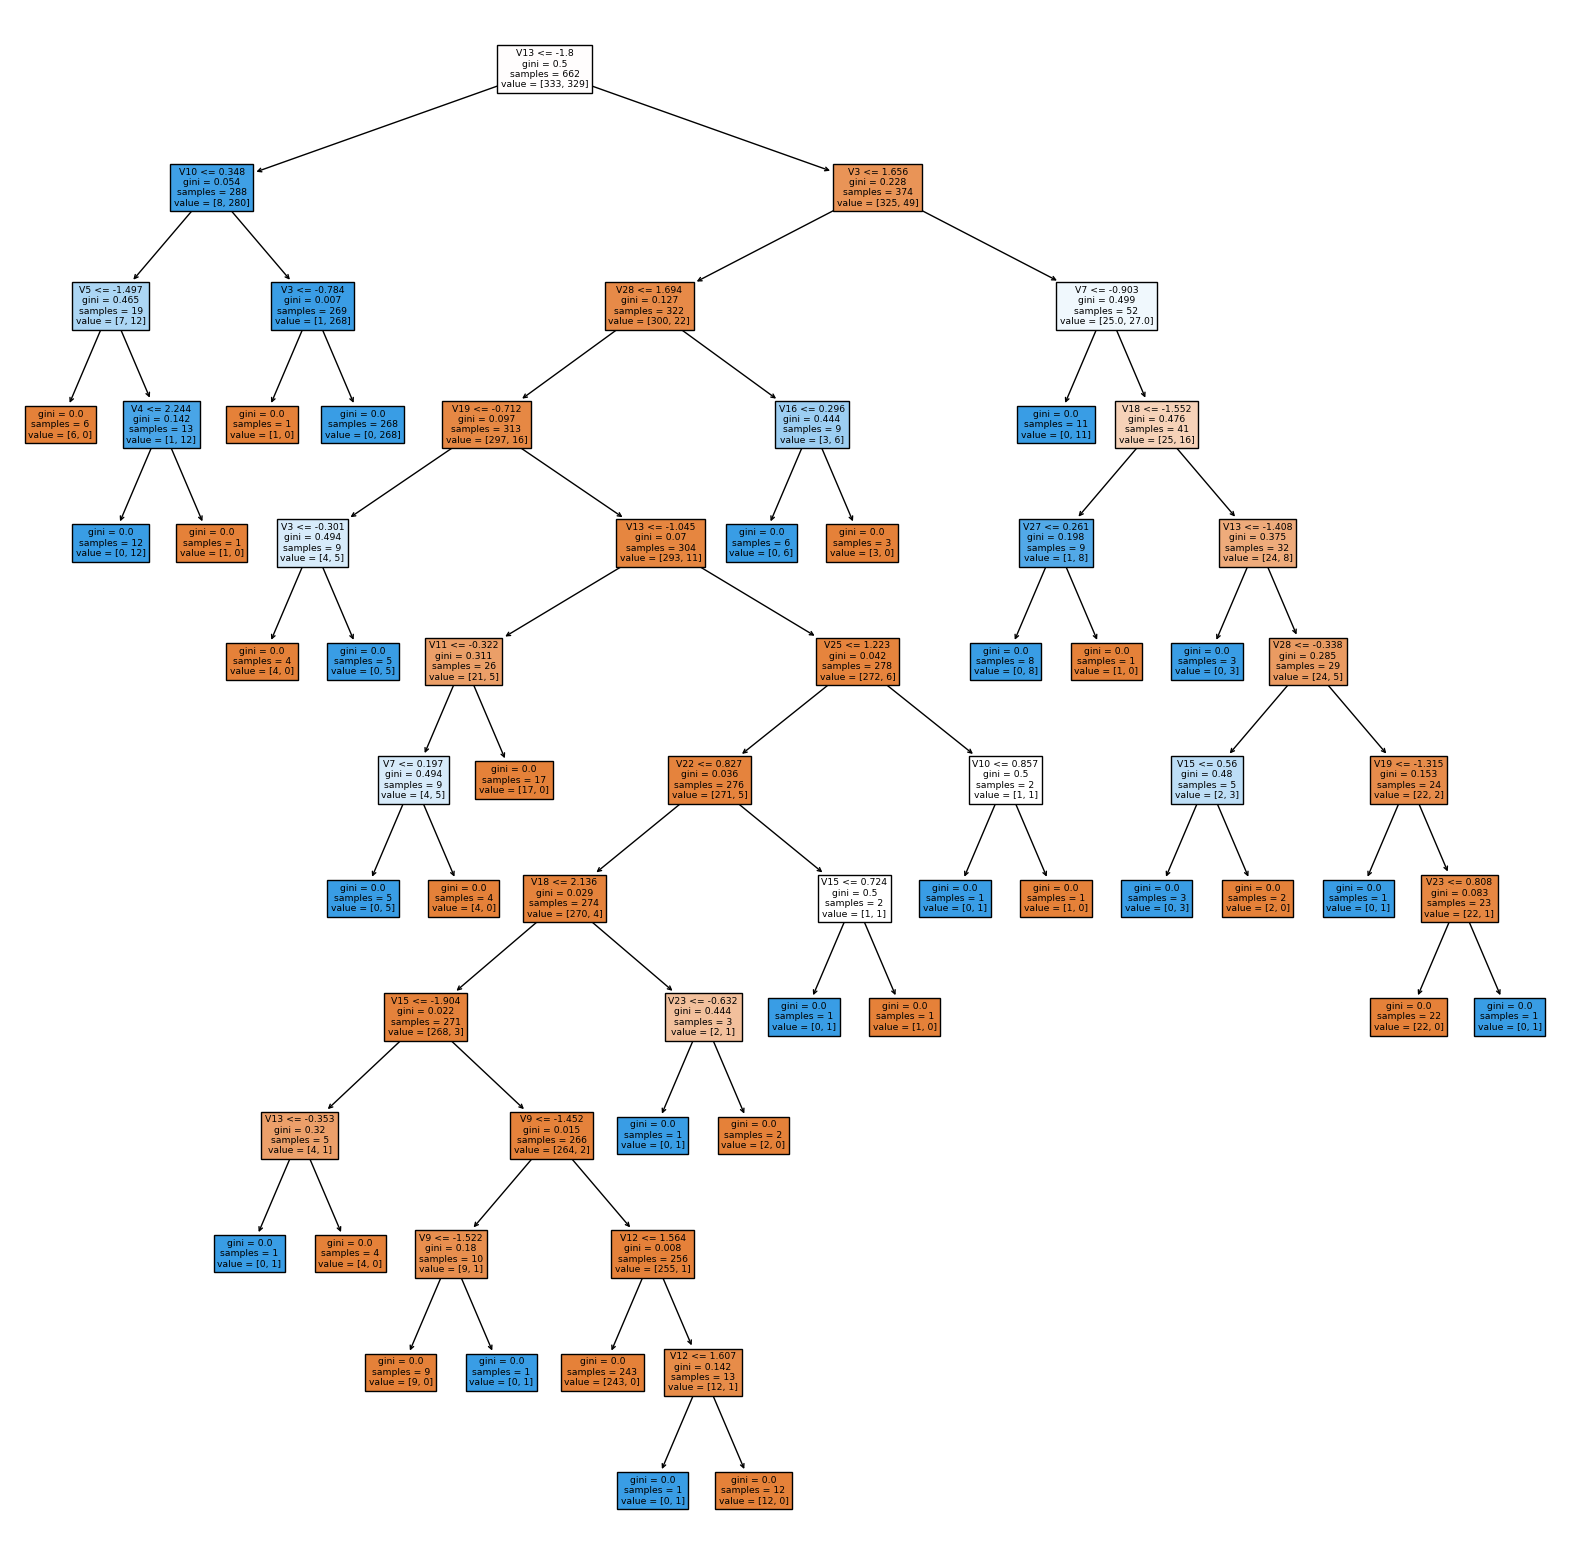

In [33]:
from sklearn import tree
#features=df.columns
fig=plt.figure(figsize=(20,20))
tree.plot_tree(dt,feature_names=df.columns.tolist(),filled=True)
plt.show()

In [34]:
dt.score(xtrain,ytrain)

1.0

In [35]:
dt.score(xtest,ytest)

0.9084507042253521

In [36]:
#tr>te ------ overfitting , so we have to apply pruning techniques

In [37]:
parameters = {
    "criterion":['gini','entropy'],
    "max_depth" : list(range(2,6)),
    "min_samples_split" : list(range(3,8))
}

In [38]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(dt, parameters , verbose=2)
clf.fit(xtrain,ytrain)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ...criterion=gini, max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_sa

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [3, 4, 5, 6, 7]},
             verbose=2)

In [39]:
clf.best_score_

0.9305878332194123

In [40]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=3,
                       random_state=42)

In [41]:
dt1=DecisionTreeClassifier(max_depth=5, min_samples_split=4)
dt1.fit(xtrain,ytrain)
ypred = dt1.predict(xtest)
print("Trining Score",dt1.score(xtrain,ytrain))
print("Testing score",dt1.score(xtest,ytest))

Trining Score 0.9758308157099698
Testing score 0.9330985915492958


In [42]:
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"confusion_matrix : \n{cm} \n classification_report : \n{cr}")

confusion_matrix : 
[[132   8]
 [ 11 133]] 
 classification_report : 
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       140
           1       0.94      0.92      0.93       144

    accuracy                           0.93       284
   macro avg       0.93      0.93      0.93       284
weighted avg       0.93      0.93      0.93       284



In [43]:
dic={"Input feature" : features.columns,"Information Gain" : dt1.feature_importances_}
df1=pd.DataFrame(dic)
df1


,Input feature,Information Gain
0,V1,0.000000
1,V2,0.000000
2,V3,0.000000
3,V4,0.081393
4,V5,0.011970
5,V6,0.023108
6,V7,0.021302
7,V8,0.000000
8,V9,0.013212
9,V10,0.000000


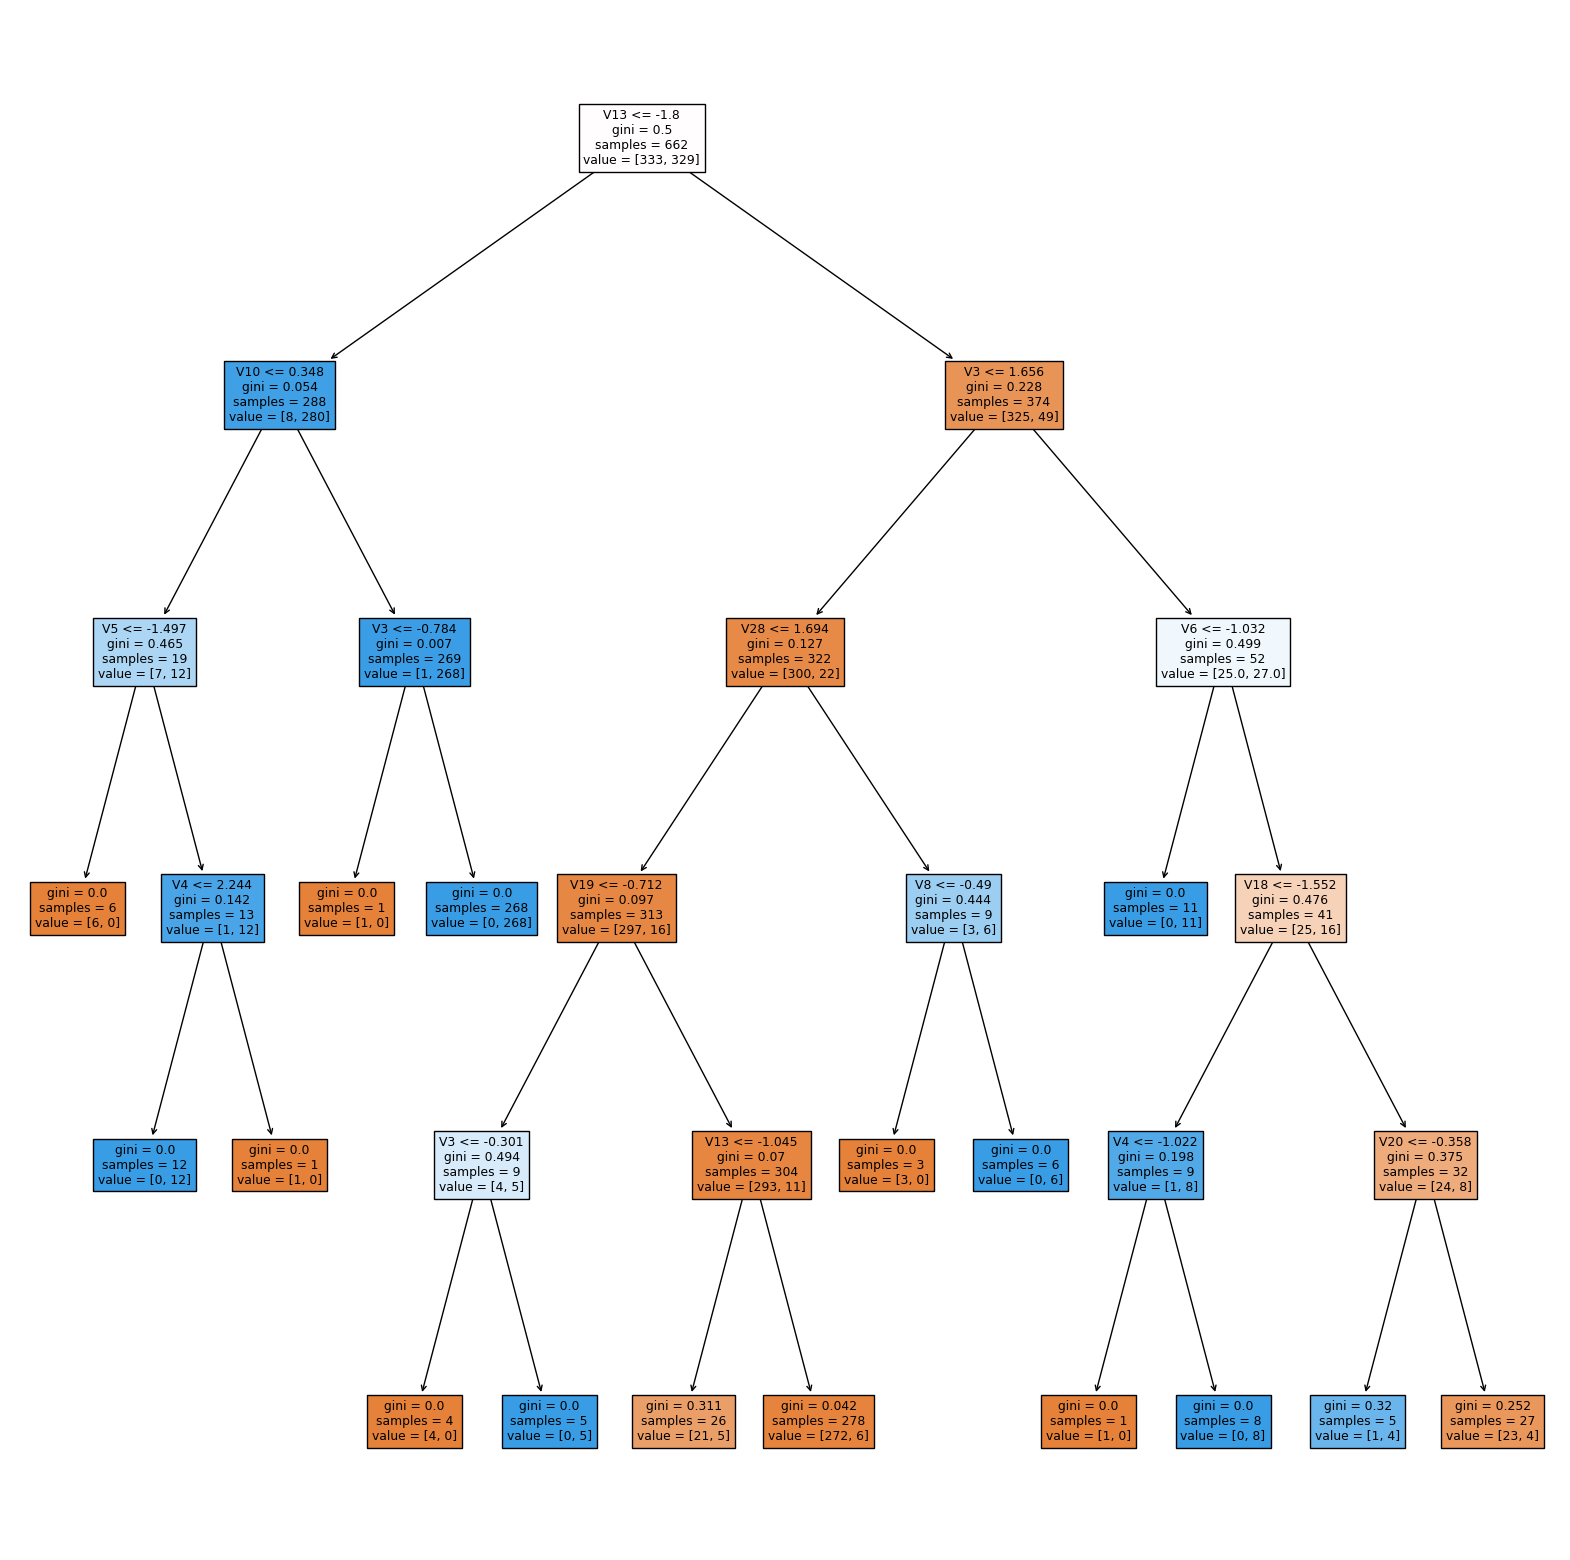

In [44]:
from sklearn import tree
#features=df.columns
fig=plt.figure(figsize=(20,20))
tree.plot_tree(dt1,feature_names=df.columns.tolist(),filled=True)
plt.show()

In [45]:
from sklearn import metrics
DecisionTree= metrics.accuracy_score(ytest, ypred) * 100
print("\n The Accuracy Score Using Algorithm Decision Tree Classifier: ", DecisionTree)


 The Accuracy Score Using Algorithm Decision Tree Classifier:  93.30985915492957


In [46]:
clf = RandomForestClassifier()
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)
print(clf.score(xtrain,ytrain))
print(clf.score(xtest,ytest))

1.0
0.9401408450704225


In [47]:
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"confusion_matrix : \n{cm} \n classification_report : \n{cr}")

confusion_matrix : 
[[135   5]
 [ 12 132]] 
 classification_report : 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       140
           1       0.96      0.92      0.94       144

    accuracy                           0.94       284
   macro avg       0.94      0.94      0.94       284
weighted avg       0.94      0.94      0.94       284



In [48]:
from sklearn import metrics
RandomForest= metrics.accuracy_score(ytest, ypred) * 100
print("\n The Accuracy Score Using Algorithm RandomForest Classifier: ", RandomForest)



 The Accuracy Score Using Algorithm RandomForest Classifier:  94.01408450704226
